Final Project - Money Oriented
Anggota :
1. Attariq M Kasfilla
2. Nizar Mochammad Yusuf

In [100]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from imblearn import over_sampling, under_sampling

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.4
seaborn version :  0.11.1


# Load Dataset

In [101]:
df_zscore = pd.read_csv('df_zscore.csv')
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
# smote_1 = pd.read_csv('smote_1.csv')
# smote_2 = pd.read_csv('smote_2.csv')

In [96]:
df_zscore.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,Attrition,DistanceFromHome_Label,BusinessTravel_label,Department_label,EducationField_label,Gender_label,JobRole_label,MaritalStatus_label,OverTime_label,Attrition_label
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,Yes,1,2,2,1,0,7,2,1,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,No,1,1,1,1,1,6,1,0,0


# Stage 2

In [120]:
features = ['Education','EnvironmentSatisfaction','JobInvolvement','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','DistanceFromHome_Label']

## Exploratory Data Analysis

In [97]:
# mengambil kolom numerik

# numerik
num_dtypes = ['int64','float64', 'int32']
num_df = df_zscore.select_dtypes(num_dtypes)
numerik = num_df.columns

df_zscore[numerik].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsWithCurrManager,DistanceFromHome_Label,BusinessTravel_label,Department_label,EducationField_label,Gender_label,JobRole_label,MaritalStatus_label,OverTime_label,Attrition_label
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,36.258111,806.054074,9.176640,2.896179,2.725306,65.847152,2.733237,1.956020,2.741168,6025.912040,...,3.800288,1.457102,1.604182,1.260995,2.256669,0.602019,4.501802,1.103100,0.284787,0.165105
std,8.838767,403.163183,8.088602,1.023198,1.090541,20.280564,0.709296,1.015862,1.100990,4248.299591,...,3.258874,0.746419,0.667584,0.526032,1.336205,0.489658,2.480624,0.728841,0.451476,0.371409
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,467.500000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2847.500000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,35.000000,807.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4739.000000,...,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1.000000,0.000000,0.000000
75%,42.000000,1160.000000,14.000000,4.000000,4.000000,83.000000,3.000000,2.000000,4.000000,7325.000000,...,7.000000,2.000000,2.000000,2.000000,3.000000,1.000000,7.000000,2.000000,1.000000,0.000000
max,60.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19943.000000,...,14.000000,3.000000,2.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000,1.000000


In [98]:
# # mengambil kolom kategori
cat_dtypes = ['object']
cat_df = df_zscore.select_dtypes(cat_dtypes)
kategori = cat_df.columns

df_zscore[kategori].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
count,1387,1387,1387,1387,1387,1387,1387,1387
unique,3,3,6,2,9,3,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No,No
freq,981,909,570,835,313,636,992,1158


In [50]:
df_zscore['YearsAtCompany'].describe()

count    1387.000000
mean        6.104542
std         4.679161
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        25.000000
Name: YearsAtCompany, dtype: float64

## Business Insight and Visualization

In [4]:
df_zscore['YearsAtCompany'].describe()

count    1387.000000
mean        6.104542
std         4.679161
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        25.000000
Name: YearsAtCompany, dtype: float64

In [5]:
ya = 
yac = df_zscore.groupby('YearsAtCompany')['Attrition_label'].count().reset_index()

### Univariate

#### Numerikal

In [105]:
kategori

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Attrition'],
      dtype='object')

In [101]:
kategori.shape

(8,)

In [106]:
numerik[:-8]

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome_Label'],
      dtype='object')

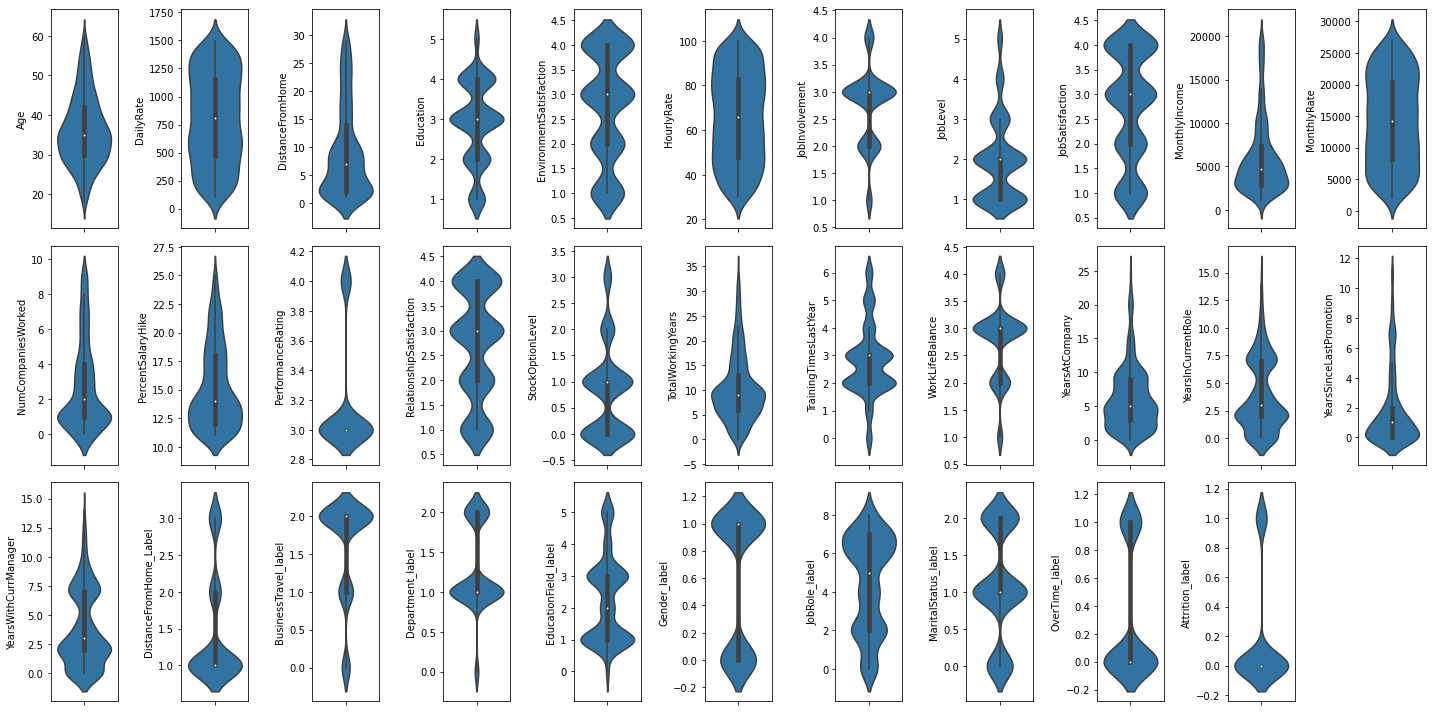

In [115]:
plt.figure(figsize=(20,10))

for i in range(0, len(numerik)):
    plt.subplot(3, round(len(numerik)/3), i+1)
    sns.violinplot(y=df_zscore[numerik[i]], orient='v')
    plt.tight_layout()


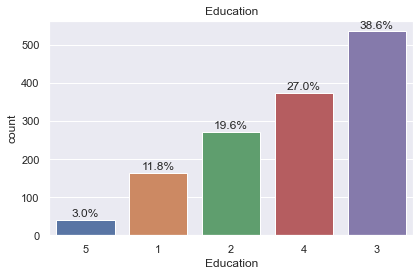

In [140]:
sns.set(style='darkgrid')
plt.title('Education')
ax = sns.countplot(x=df_zscore['Education'],order=df_zscore['Education'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Education
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

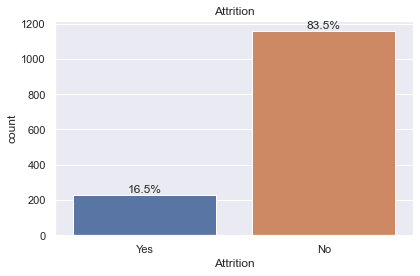

In [4]:
sns.set(style='darkgrid')
plt.title('Attrition')
ax = sns.countplot(x=df_zscore['Attrition'],order=df_zscore['Attrition'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14)

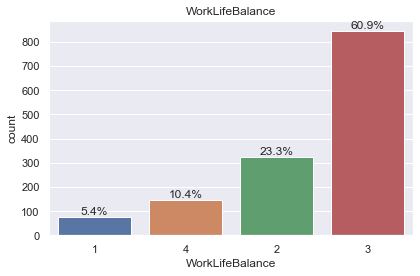

In [5]:
sns.set(style='darkgrid')
plt.title('WorkLifeBalance')
ax = sns.countplot(x=df_zscore['WorkLifeBalance'],order=df_zscore['WorkLifeBalance'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

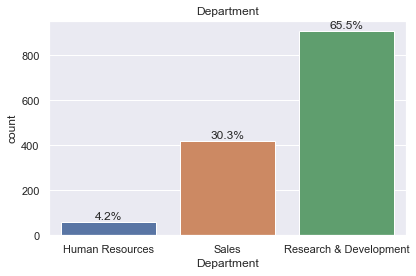

In [17]:
sns.set(style='darkgrid')
plt.title('Department')
ax = sns.countplot(x=df_zscore['Department'],order=df_zscore['Department'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

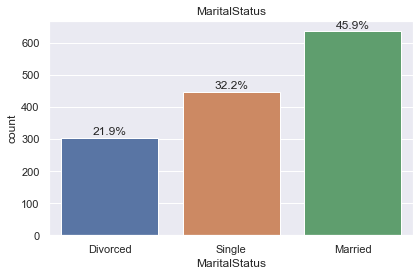

In [18]:
sns.set(style='darkgrid')
plt.title('MaritalStatus')
ax = sns.countplot(x=df_zscore['MaritalStatus'],order=df_zscore['MaritalStatus'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

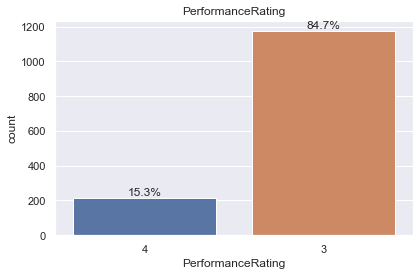

In [20]:
sns.set(style='darkgrid')
plt.title('PerformanceRating')
ax = sns.countplot(x=df_zscore['PerformanceRating'],order=df_zscore['PerformanceRating'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [3]:
work_map = {1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'}

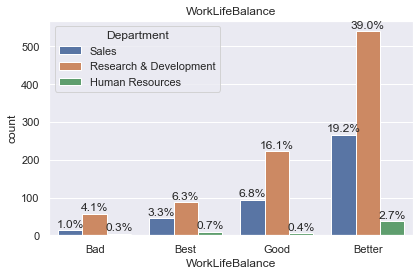

In [5]:
sns.set(style='darkgrid')
plt.title('WorkLifeBalance')
ax = sns.countplot(x=df_zscore['WorkLifeBalance'].map(work_map),hue=df_zscore['Department'],order=df_zscore['WorkLifeBalance'].map(work_map).value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

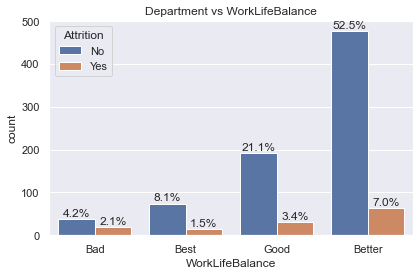

In [13]:
sns.set(style='darkgrid')
plt.title('Department vs WorkLifeBalance')
ax = sns.countplot(x=df_rd['WorkLifeBalance'].map(work_map),hue=df_rd['Attrition'],order=df_rd['WorkLifeBalance'].map(work_map).value_counts(ascending=True).index)
total = len(df_rd)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [21]:
involment_map = {1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'}

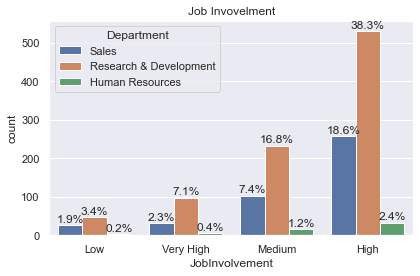

In [24]:
sns.set(style='darkgrid')
plt.title('Job Invovelment')
ax = sns.countplot(x=df_zscore['JobInvolvement'].map(involment_map),hue=df_zscore['Department'],order=df_zscore['JobInvolvement'].map(involment_map).value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

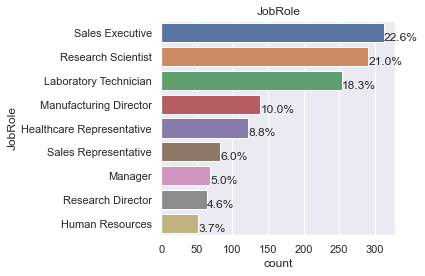

In [22]:
sns.set(style='darkgrid')
plt.title('JobRole')
ax = sns.countplot(y=df_zscore['JobRole'],order=df_zscore['JobRole'].value_counts(ascending=False).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%\n'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2   
    ax.annotate(percentage, (x, y), ha='left', va='top')
plt.tight_layout()
plt.show()

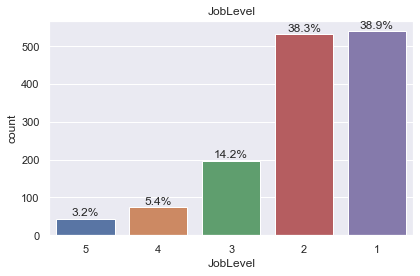

In [23]:
sns.set(style='darkgrid')
plt.title('JobLevel')
ax = sns.countplot(x=df_zscore['JobLevel'],order=df_zscore['JobLevel'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

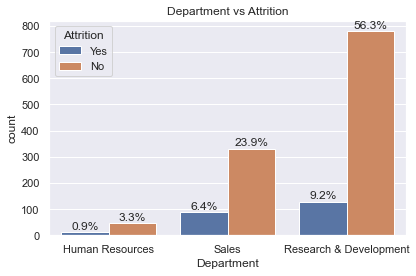

In [25]:
sns.set(style='darkgrid')
plt.title('Department vs Attrition')
ax = sns.countplot(x=df_zscore['Department'],hue=df_zscore['Attrition'],order=df_zscore['Department'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [45]:
df_hr = df_zscore[df_zscore['Department']=='Human Resources'].reset_index()
df_sales = df_zscore[df_zscore['Department']=='Sales'].reset_index()
df_rd = df_zscore[df_zscore['Department']=='Research & Development'].reset_index()

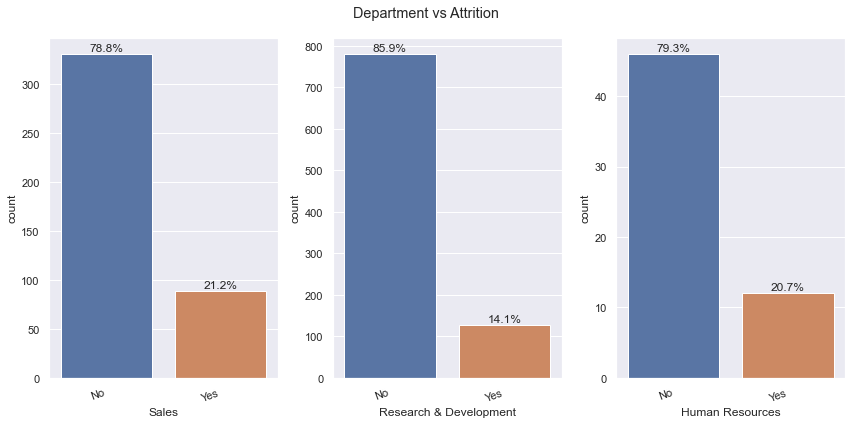

In [10]:
plt.figure(figsize=(12,6))
plt.suptitle('Department vs Attrition')
sns.set(style='darkgrid')

for i in range(0, len(df_zscore['Department'].unique())):
    x = df_zscore[df_zscore['Department'] == df_zscore['Department'].unique()[i]].sort_values(by='Attrition')

    plt.subplot(1, round(len(df_zscore['Department'].unique())/1), i+1)
    
    ax = sns.countplot(x['Attrition'], orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
    
    total1 = len(x)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total1:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

    plt.tight_layout()
    plt.xlabel(df_zscore['Department'].unique()[i])

In [25]:
map_job = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

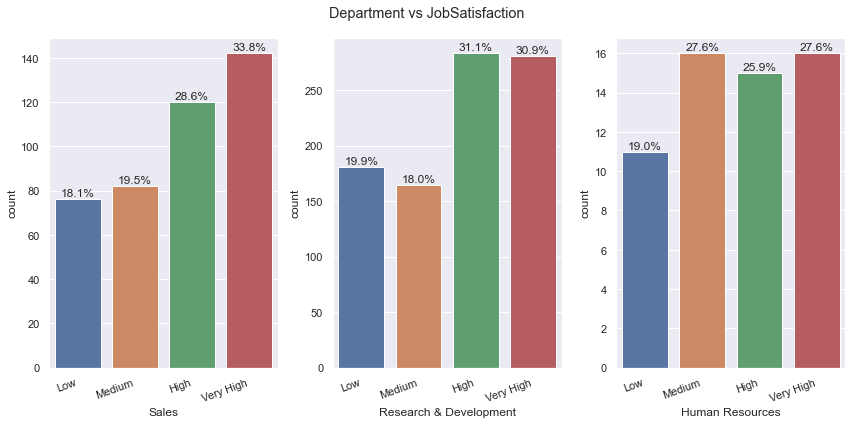

In [37]:
plt.figure(figsize=(12,6))
plt.suptitle('Department vs JobSatisfaction')
sns.set(style='darkgrid')

for i in range(0, len(df_zscore['Department'].unique())):
    x = df_zscore[df_zscore['Department'] == df_zscore['Department'].unique()[i]].sort_values(by='JobSatisfaction')

    plt.subplot(1, round(len(df_zscore['Department'].unique())/1), i+1)
    
    ax = sns.countplot(x['JobSatisfaction'].map(map_job), orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
    
    total1 = len(x)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total1:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

    plt.tight_layout()
    plt.xlabel(df_zscore['Department'].unique()[i])

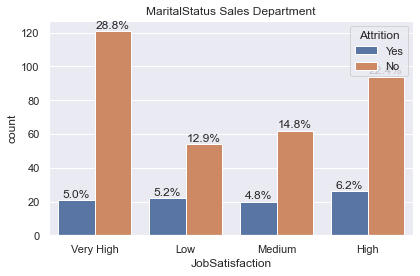

In [46]:
sns.set(style='darkgrid')
plt.title('MaritalStatus Sales Department')
ax = sns.countplot(x=df_sales['JobSatisfaction'].map(map_job),hue=df_sales['Attrition'])
total = len(df_sales)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

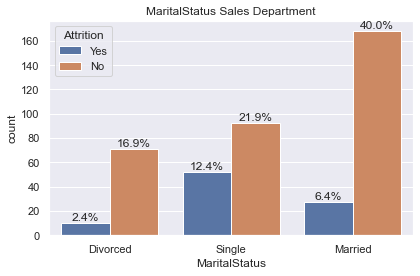

In [20]:
sns.set(style='darkgrid')
plt.title('MaritalStatus Sales Department')
ax = sns.countplot(x=df_sales['MaritalStatus'],hue=df_sales['Attrition'],order=df_sales['MaritalStatus'].value_counts(ascending=True).index)
total = len(df_sales)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

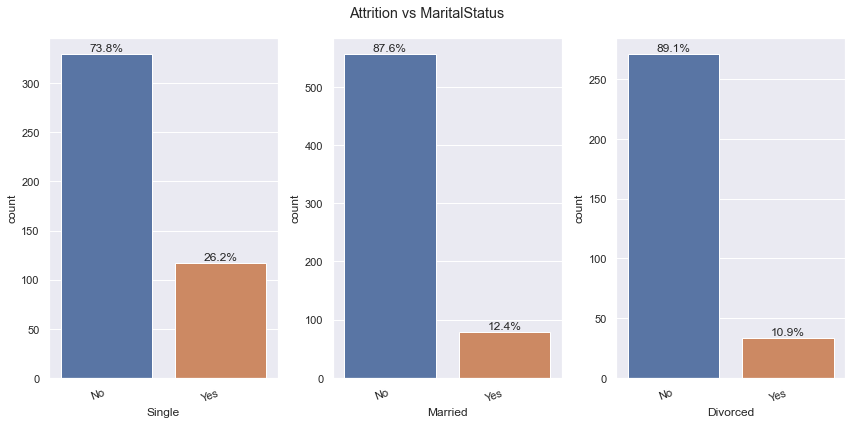

In [139]:
plt.figure(figsize=(12,6))
plt.suptitle('Attrition vs MaritalStatus')
sns.set(style='darkgrid')

for i in range(0, len(df_zscore['MaritalStatus'].unique())):
    x = df_zscore[df_zscore['MaritalStatus'] == df_zscore['MaritalStatus'].unique()[i]].sort_values(by='Attrition')

    plt.subplot(1, round(len(df_zscore['MaritalStatus'].unique())/1), i+1)
    
    ax = sns.countplot(x['Attrition'], orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
    
    total1 = len(x)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total1:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

    plt.tight_layout()
    plt.xlabel(df_zscore['MaritalStatus'].unique()[i])

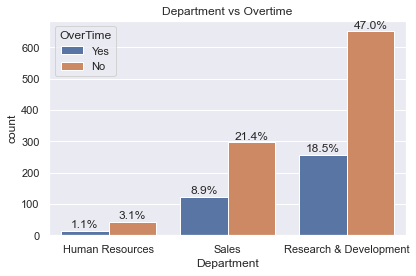

In [30]:
sns.set(style='darkgrid')
plt.title('Department vs Overtime')
ax = sns.countplot(x=df_zscore['Department'],hue=df_zscore['OverTime'],order=df_zscore['Department'].value_counts(ascending=True).index)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

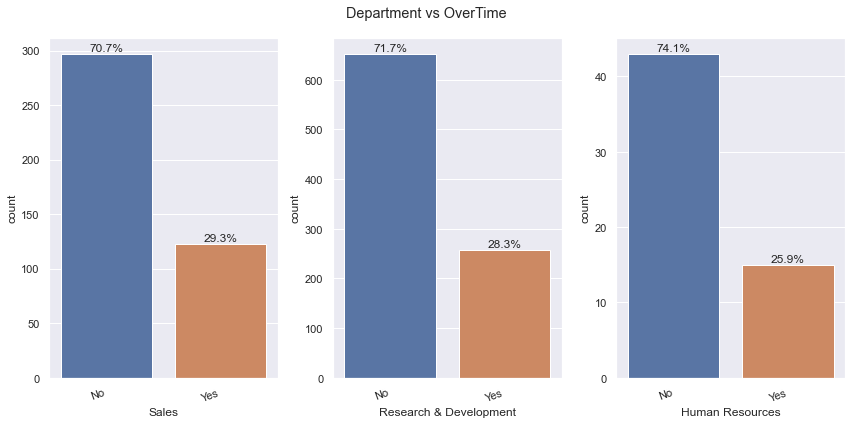

In [89]:
plt.figure(figsize=(12,6))
plt.suptitle('Department vs OverTime')
sns.set(style='darkgrid')

for i in range(0, len(df_zscore['Department'].unique())):
    x = df_zscore[df_zscore['Department'] == df_zscore['Department'].unique()[i]].sort_values(by='OverTime')

    plt.subplot(1, round(len(df_zscore['Department'].unique())/1), i+1)
    
    ax = sns.countplot(x['OverTime'], orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
    
    total1 = len(x)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total1:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

    plt.tight_layout()
    plt.xlabel(df_zscore['Department'].unique()[i])

In [135]:
df_gaji = df_zscore.groupby('Department')['MonthlyIncome'].mean().reset_index()
df_b = df_zscore.groupby('Department')['YearsInCurrentRole'].mean().reset_index()

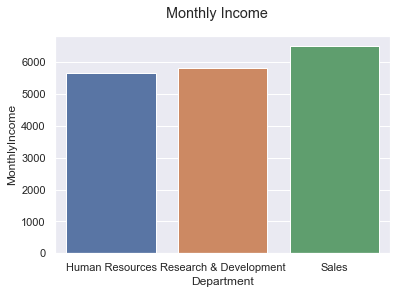

In [134]:
from numpy import mean
from numpy import median
plt.suptitle('Monthly Income')
ax = sns.barplot(x="Department", y="MonthlyIncome", data=df_gaji)

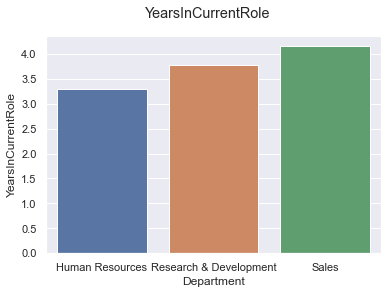

In [136]:
plt.suptitle('YearsInCurrentRole')
ax = sns.barplot(x="Department", y="YearsInCurrentRole", data=df_b,)

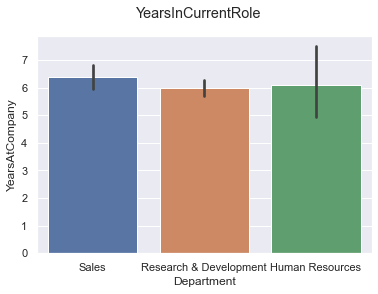

In [49]:
plt.suptitle('YearsInCurrentRole')
ax = sns.barplot(x="Department", y="YearsAtCompany", data=df_zscore,estimator=mean)

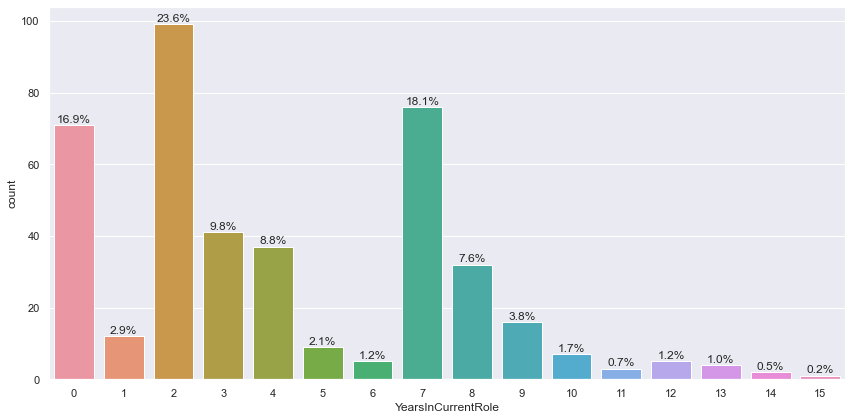

In [46]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
ax = sns.countplot(x='YearsInCurrentRole',data=df_sales)
total = len(df_sales)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [107]:
map_years_company = {}
for i in df_zscore['YearsAtCompany'].unique():
    map_years_company[i] = 2021 - i

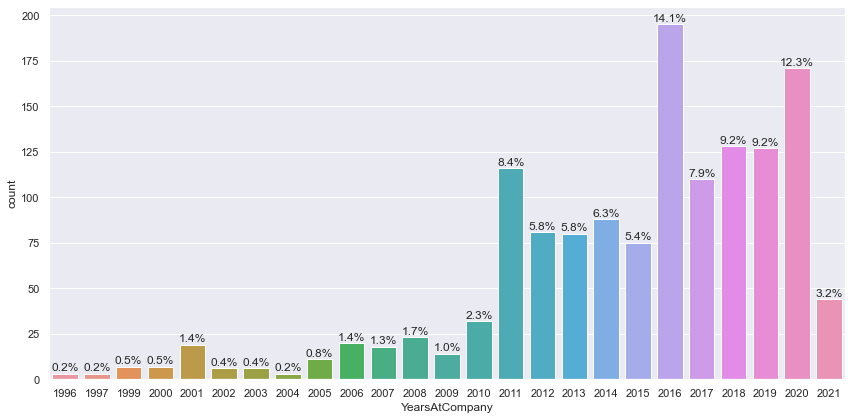

In [108]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df_zscore['YearsAtCompany'].map(map_years_company),data=df_zscore)
total = len(df_zscore)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [111]:
df_yes = df_zscore[df_zscore['Attrition'] == 'Yes']
df_over = df_zscore[df_zscore['OverTime'] == 'Yes']
df_over.sort_values(by='YearsAtCompany', inplace=True, ascending=False)
df_yes.sort_values(by='YearsAtCompany', inplace=True, ascending=False)

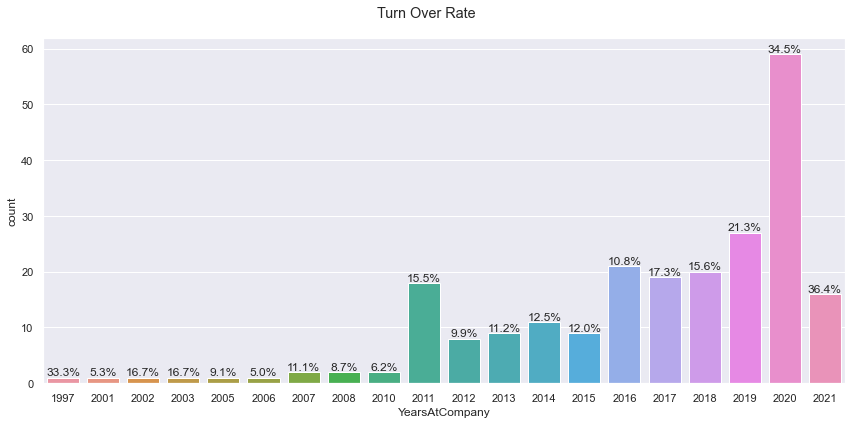

In [105]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.suptitle('Turn Over Rate')
ax = sns.countplot(x=df_yes['YearsAtCompany'].map(map_years_company),data=df_yes)
# ax = sns.countplot(x='YearsAtCompany',data=df_yes)

for i,p in enumerate(ax.patches):
    total = len(df_zscore[df_zscore['YearsAtCompany'] == df_yes['YearsAtCompany'].unique()[i]])
    percentage = f'{100*p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout()
plt.show()

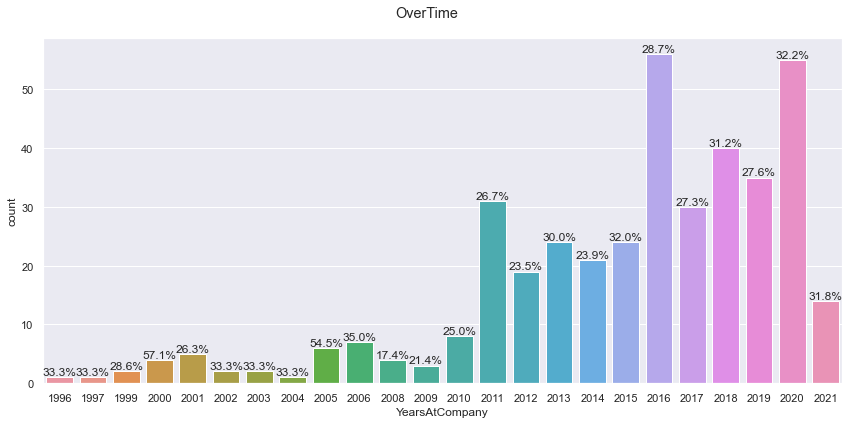

In [112]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.suptitle('OverTime')
ax = sns.countplot(x=df_over['YearsAtCompany'].map(map_years_company),data=df_over)
# ax = sns.countplot(x='YearsAtCompany',data=df_yes)

for i,p in enumerate(ax.patches):
    total = len(df_zscore[df_zscore['YearsAtCompany'] == df_over['YearsAtCompany'].unique()[i]])
    percentage = f'{100*p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [126]:
df_ok = df_zscore.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()
df_ok

,YearsAtCompany,MonthlyIncome
0,0,4113.500000
1,1,4681.304094
2,2,4953.511811
3,3,5079.000000
4,4,5109.872727
5,5,5667.851282
6,6,5500.906667
7,7,6524.431818
8,8,6415.125000
9,9,7086.604938


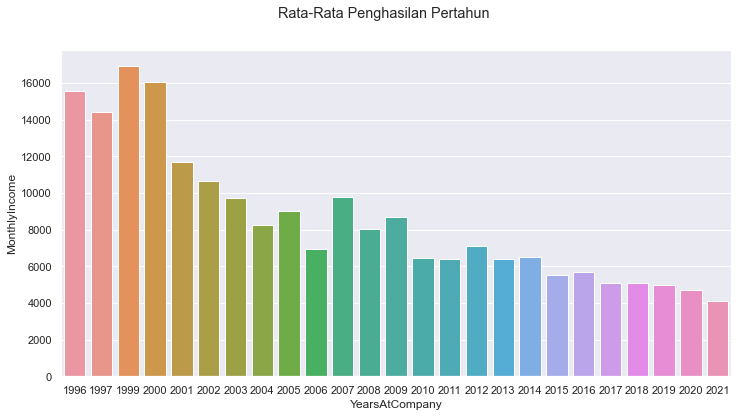

In [127]:
plt.figure(figsize=(12,6))
plt.suptitle('Rata-Rata Penghasilan Pertahun ')
ax = sns.barplot(x=df_ok["YearsAtCompany"].map(map_years_company), y=df_ok["MonthlyIncome"], data=df_ok)

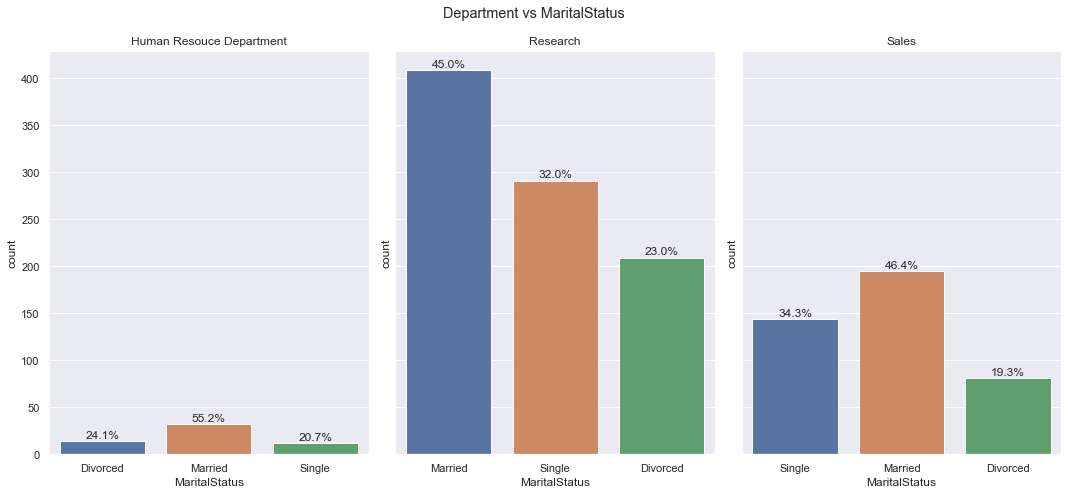

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)
fig.suptitle('Department vs MaritalStatus')
ax1 = sns.countplot(ax=axes[0],x=df_hr['MaritalStatus'],data=df_hr)
axes[0].set_title('Human Resouce Department')
total1 = len(df_hr)
for p in ax1.patches:
    percentage = f'{100 * p.get_height() / total1:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='center')
ax2 = sns.countplot(ax=axes[1],x=df_rd['MaritalStatus'],data=df_rd)
axes[1].set_title('Research')
total2 = len(df_rd)
for p1 in ax2.patches:
    percentage1 = f'{100 * p1.get_height() / total2:.1f}%\n'
    x1 = p1.get_x() + p1.get_width() / 2
    y1 = p1.get_height()
    ax2.annotate(percentage1, (x1, y1), ha='center', va='center')
ax3 = sns.countplot(ax=axes[2],x=df_sales['MaritalStatus'],data=df_sales)
axes[2].set_title('Sales')
total3 = len(df_sales)
for p2 in ax3.patches:
    percentage2 = f'{100 * p2.get_height() / total3:.1f}%\n'
    x2 = p2.get_x() + p2.get_width() / 2
    y2 = p2.get_height()
    ax3.annotate(percentage2, (x2, y2), ha='center', va='center')
plt.tight_layout()
plt.show()

### Multivariate

#### General

<AxesSubplot:>

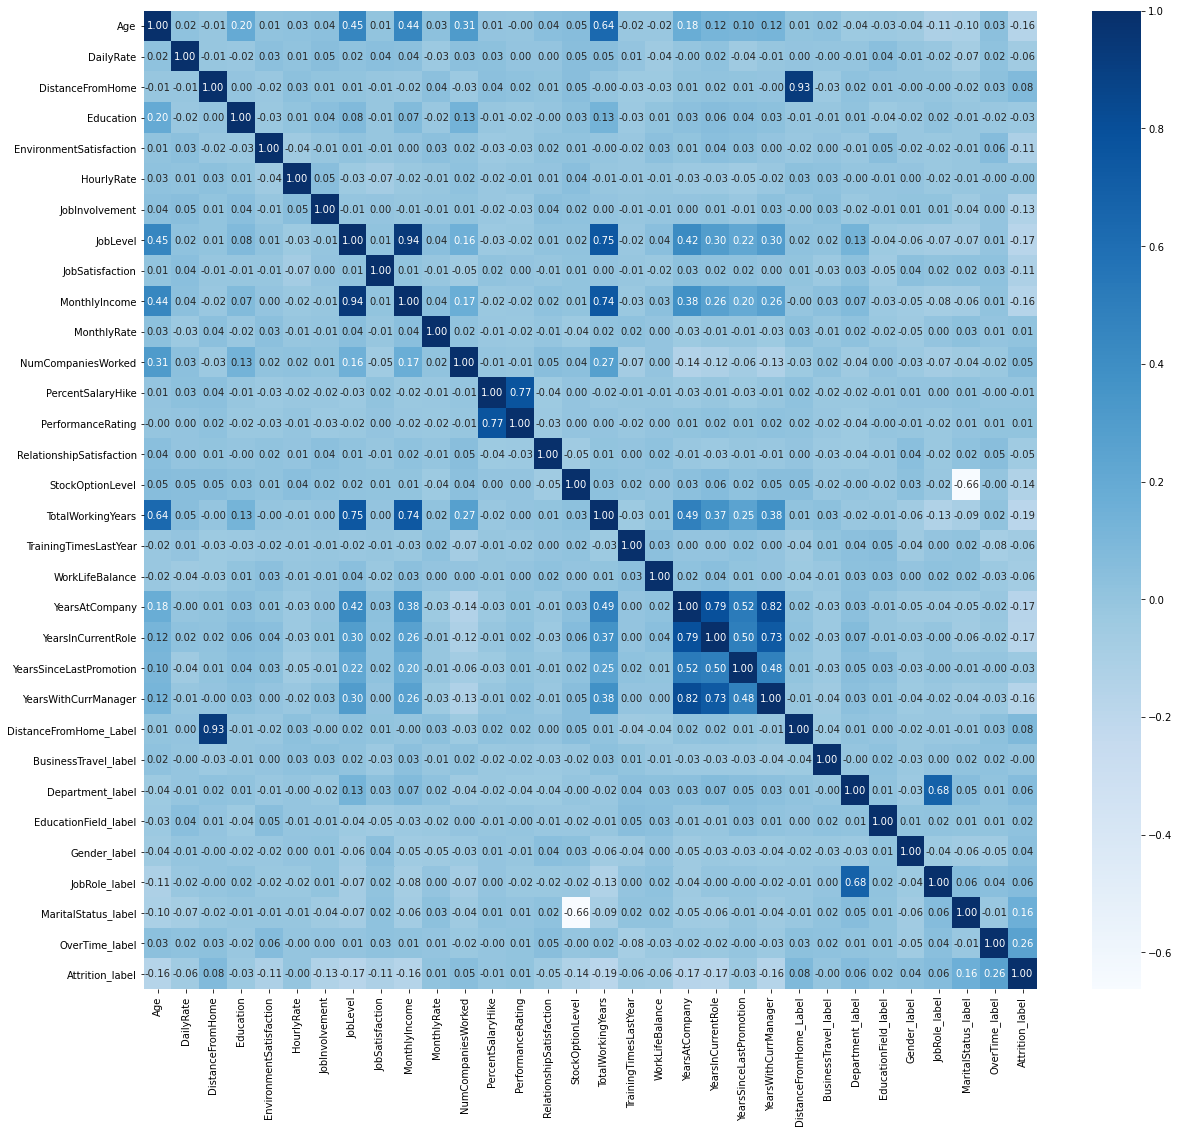

In [125]:
plt.figure(figsize=(20,18))
sns.heatmap(df_zscore.corr(), cmap='Blues', annot=True, fmt='.2f')

In [28]:
features = ['Department_label','EnvironmentSatisfaction','JobInvolvement','OverTime_label','YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager','WorkLifeBalance','MonthlyIncome','Attrition_label']

<AxesSubplot:>

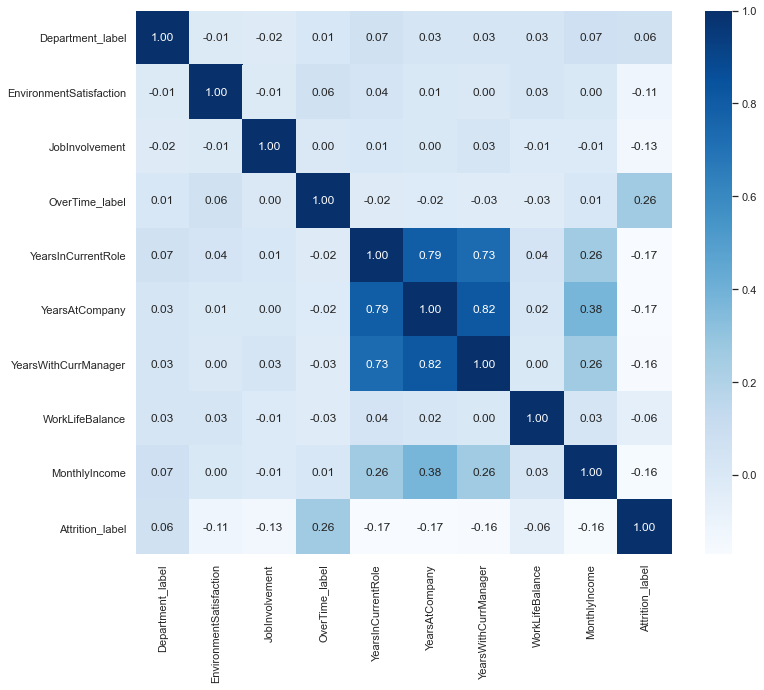

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df_zscore[features].corr(), cmap='Blues', annot=True, fmt='.2f')

In [33]:
Y = df_zscore[features]
pxs = Y.corr(method='pearson', min_periods=0.2)
pxs = pxs.abs()
pxs.sort_values(by='Attrition_label', inplace=True, ascending=False)
pxs

,Department_label,EnvironmentSatisfaction,JobInvolvement,OverTime_label,YearsInCurrentRole,YearsAtCompany,YearsWithCurrManager,WorkLifeBalance,MonthlyIncome,Attrition_label
Attrition_label,0.063637,0.112393,0.133957,0.257237,0.171015,0.166455,0.162297,0.062492,0.161848,1.000000
OverTime_label,0.014908,0.059355,0.000837,1.000000,0.021968,0.019568,0.031931,0.032425,0.014046,0.257237
YearsInCurrentRole,0.065536,0.038837,0.012514,0.021968,1.000000,0.793691,0.732353,0.038592,0.260340,0.171015
YearsAtCompany,0.032583,0.006621,0.003191,0.019568,0.793691,1.000000,0.820255,0.022394,0.380543,0.166455
YearsWithCurrManager,0.034216,0.001606,0.029998,0.031931,0.732353,0.820255,1.000000,0.003233,0.259423,0.162297
MonthlyIncome,0.071876,0.003011,0.010269,0.014046,0.260340,0.380543,0.259423,0.032167,1.000000,0.161848
JobInvolvement,0.024040,0.012720,1.000000,0.000837,0.012514,0.003191,0.029998,0.006875,0.010269,0.133957
EnvironmentSatisfaction,0.014540,1.000000,0.012720,0.059355,0.038837,0.006621,0.001606,0.032492,0.003011,0.112393
Department_label,1.000000,0.014540,0.024040,0.014908,0.065536,0.032583,0.034216,0.026978,0.071876,0.063637
WorkLifeBalance,0.026978,0.032492,0.006875,0.032425,0.038592,0.022394,0.003233,1.000000,0.032167,0.062492


<AxesSubplot:xlabel='Attrition_label', ylabel='index'>

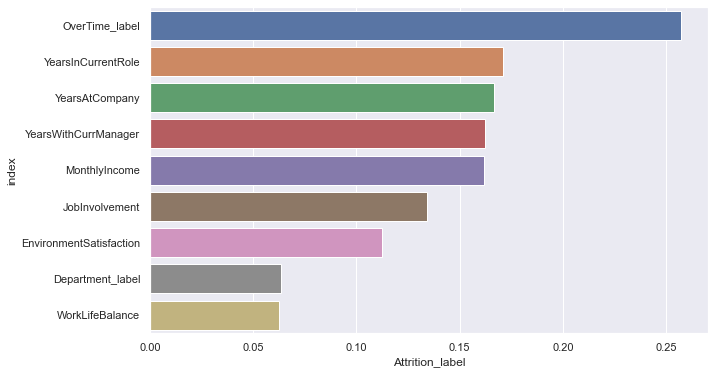

In [35]:
plt.figure(figsize=(10,6))

pxs_scor_accuracy = pxs.iloc[1:,-1]
pxs_scor_accuracy
sns.barplot(y='index', x='Attrition_label', data=pxs_scor_accuracy.reset_index())